In [31]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

from matplotlib import pyplot as plt
import numpy as np
import arrayfire as af
import h5py

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import advection_2d
from dg_maxwell import global_variables as gvar
from dg_maxwell import utils
from dg_maxwell import advection_2d_arbit_mesh as a2d_arbit_mesh
from dg_maxwell import wave_equation_2d
from dg_maxwell import lagrange

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

In [27]:
params.mesh_file = '../read_and_plot_mesh/mesh/square_mesh_4_parts.msh'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)
new_elements = msh_parser.rearrange_element_edges(advec_var.elements, advec_var)
advec_var.reassign_2d_elements(new_elements)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Initializing...
gmshTranslator: Mesh has 441 nodes.
gmshTranslator: Mesh has 169 elements.
gmshTranslator: Processed 614 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
advection_variables __init__ completed


In [38]:
x_e_ij = af.reorder(advec_var.x_e_ij, d0 = 0, d1 = 2, d2 = 1)
x_e_ij = af.moddims(x_e_ij, d0 = params.N_LGL, d1 = params.N_LGL, d2 = advec_var.elements.shape[0])

y_e_ij = af.reorder(advec_var.y_e_ij, d0 = 0, d1 = 2, d2 = 1)
y_e_ij = af.moddims(y_e_ij, d0 = params.N_LGL, d1 = params.N_LGL, d2 = advec_var.elements.shape[0])

i = 70
h5py_data = h5py.File('../../results/2d_hdf5_%02d/dump_timestep_%06d' %(int(params.N_LGL), int(10 * i)) + '.hdf5', 'r')
u_LGL     = af.np_to_af_array(h5py_data['u_i'][:])
#print(u_LGL.shape)
u_e_ij = u_LGL[:, :, 0]

u_e_ij = af.reorder(advec_var.u_e_ij, d0 = 0, d1 = 2, d2 = 1)
u_e_ij = af.moddims(u_e_ij, d0 = params.N_LGL, d1 = params.N_LGL, d2 = advec_var.elements.shape[0])

24
29
54
75


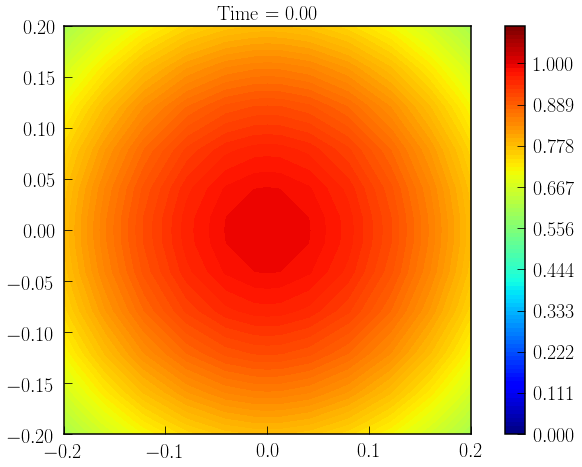

In [39]:
color_levels = np.linspace(0, 1.1, 100)

# fig = plt.figure()

element_tag = 24
index = 0

# for element_tag in range(advec_var.elements.shape[0]):
print(element_tag)
plt.contourf(np.array(x_e_ij[:, :, element_tag]), np.array(y_e_ij[:, :, element_tag]),
             np.array(u_e_ij[:, :, element_tag]), 200, levels = color_levels, cmap = 'jet')

element_tag = 29
index = 0

# for element_tag in range(advec_var.elements.shape[0]):
print(element_tag)
plt.contourf(np.array(x_e_ij[:, :, element_tag]), np.array(y_e_ij[:, :, element_tag]),
             np.array(u_e_ij[:, :, element_tag]), 200, levels = color_levels, cmap = 'jet')

element_tag = 54
index = 0

# for element_tag in range(advec_var.elements.shape[0]):
print(element_tag)
plt.contourf(np.array(x_e_ij[:, :, element_tag]), np.array(y_e_ij[:, :, element_tag]),
             np.array(u_e_ij[:, :, element_tag]), 200, levels = color_levels, cmap = 'jet')

element_tag = 75
index = 0

# for element_tag in range(advec_var.elements.shape[0]):
print(element_tag)
plt.contourf(np.array(x_e_ij[:, :, element_tag]), np.array(y_e_ij[:, :, element_tag]),
             np.array(u_e_ij[:, :, element_tag]), 200, levels = color_levels, cmap = 'jet')

plt.gca().set_aspect('equal')
plt.colorbar()
plt.title('Time = %.2f' %(index * 10 * advec_var.delta_t_2d))
# fig.savefig('results/2D_Wave_images/%04d' %(index) + '.png')
# pl.close('all')
plt.show()